In [1]:
import datacube

In [2]:
dc=datacube.Datacube(app='day2')

In [3]:
from deafrica_tools.datahandling import load_ard

In [4]:
ds_ls9_sr=load_ard(dc,
         products=['ls9_sr'],
         min_gooddata=0,
         output_crs='epsg:6933',
         resolution=(-30,30),
         y=(-1.29911,-1.31275),
         x=(36.84651,36.86437),
         time=('2022-01','2022-03'),
         measurements=['green','red','blue','nir','swir_1']
        )
         

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls9_sr
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 5 time steps


In [5]:
ds_ls9_sr['red']

<xarray.DataArray 'red' (time: 5, y: 59, x: 58)>
array([[[0.08707251, 0.10206001, 0.10684501, ..., 0.08734749,
         0.0816275 , 0.08550499],
        [0.11176749, 0.1059375 , 0.08237   , ..., 0.08355249,
         0.0820675 , 0.088255  ],
        [0.09708251, 0.08984999, 0.08102249, ..., 0.09975   ,
         0.10321499, 0.10305001],
        ...,
        [0.129725  , 0.11479251, 0.11553501, ..., 0.11231749,
         0.12568249, 0.13459249],
        [0.11820249, 0.121475  , 0.12436251, ..., 0.0976875 ,
         0.1101725 , 0.12287749],
        [0.121805  , 0.13511501, 0.1209525 , ..., 0.11677249,
         0.11834   , 0.10984249]],

       [[       nan,        nan,        nan, ..., 0.10811   ,
         0.10118   , 0.103655  ],
        [       nan,        nan,        nan, ..., 0.106075  ,
         0.10316001, 0.10428749],
        [       nan,        nan,        nan, ..., 0.11710249,
         0.11641501, 0.11999001],
...
        [0.13011001, 0.12315251, 0.13467501, ..., 0.1266175 ,
         0.11911   , 0.1277725 ],
        [0.12416999, 0.1278825 , 0.12862499, ..., 0.10505749,
         0.11801   , 0.1283225 ],
        [0.1265075 , 0.149745  , 0.13937749, ..., 0.130715  ,
         0.1327775 , 0.1282125 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.15719749,
         0.1518075 , 0.16206501],
        [       nan,        nan,        nan, ..., 0.131705  ,
         0.14479499, 0.156675  ],
        [       nan,        nan,        nan, ..., 0.157335  ,
         0.157225  , 0.1471325 ]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-16T07:43:25.746992 ... 2022-03...
  * y            (y) float64 -1.657e+05 -1.657e+05 ... -1.674e+05 -1.674e+05
  * x            (x) float64 3.555e+06 3.555e+06 ... 3.557e+06 3.557e+06
    spatial_ref  int32 6933
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

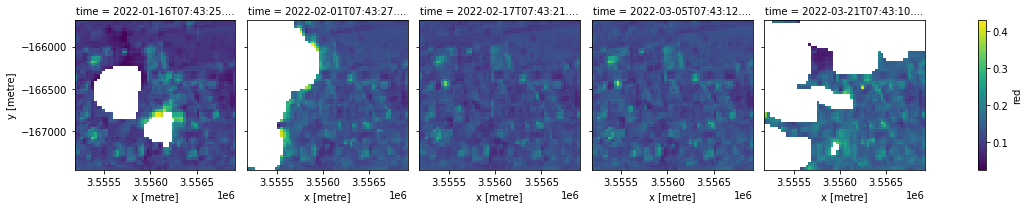

In [6]:
ds_ls9_sr['red'].plot(col='time')

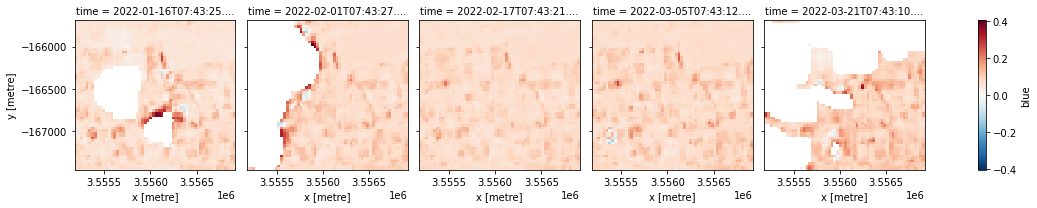

In [7]:
ds_ls9_sr['blue'].plot(col='time')

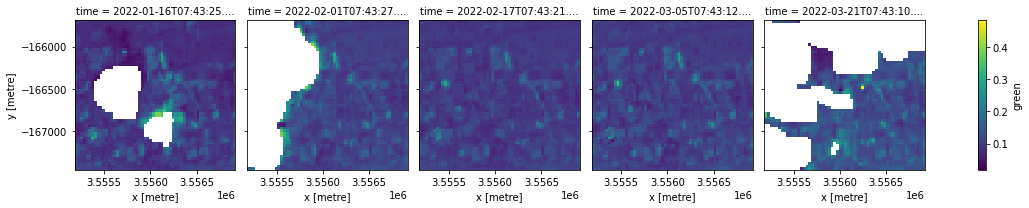

In [8]:
ds_ls9_sr['green'].plot(col='time')

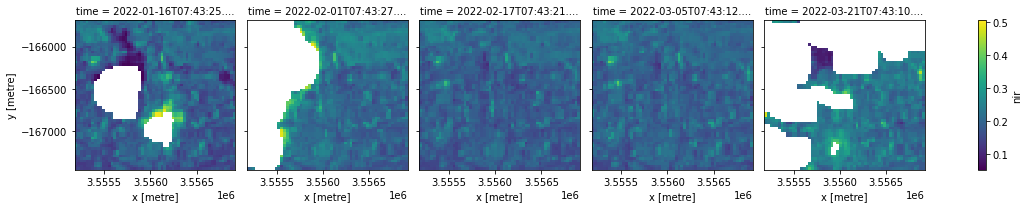

In [9]:
ds_ls9_sr['nir'].plot(col='time')

In [10]:
from deafrica_tools.plotting import rgb

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


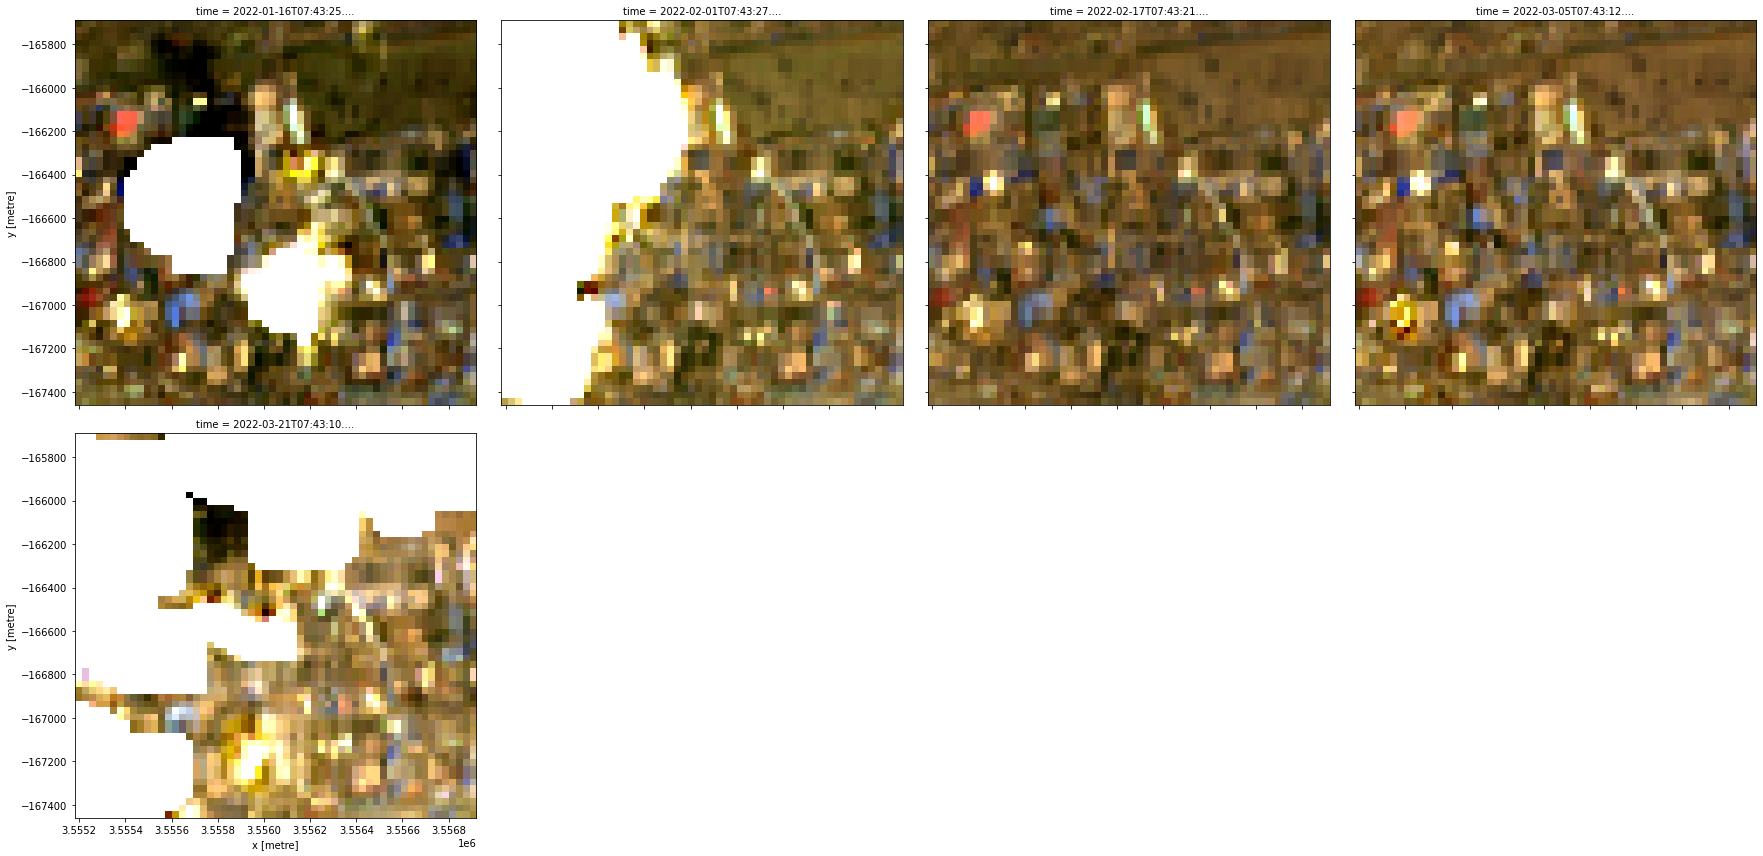

In [11]:
rgb(ds_ls9_sr,col='time')

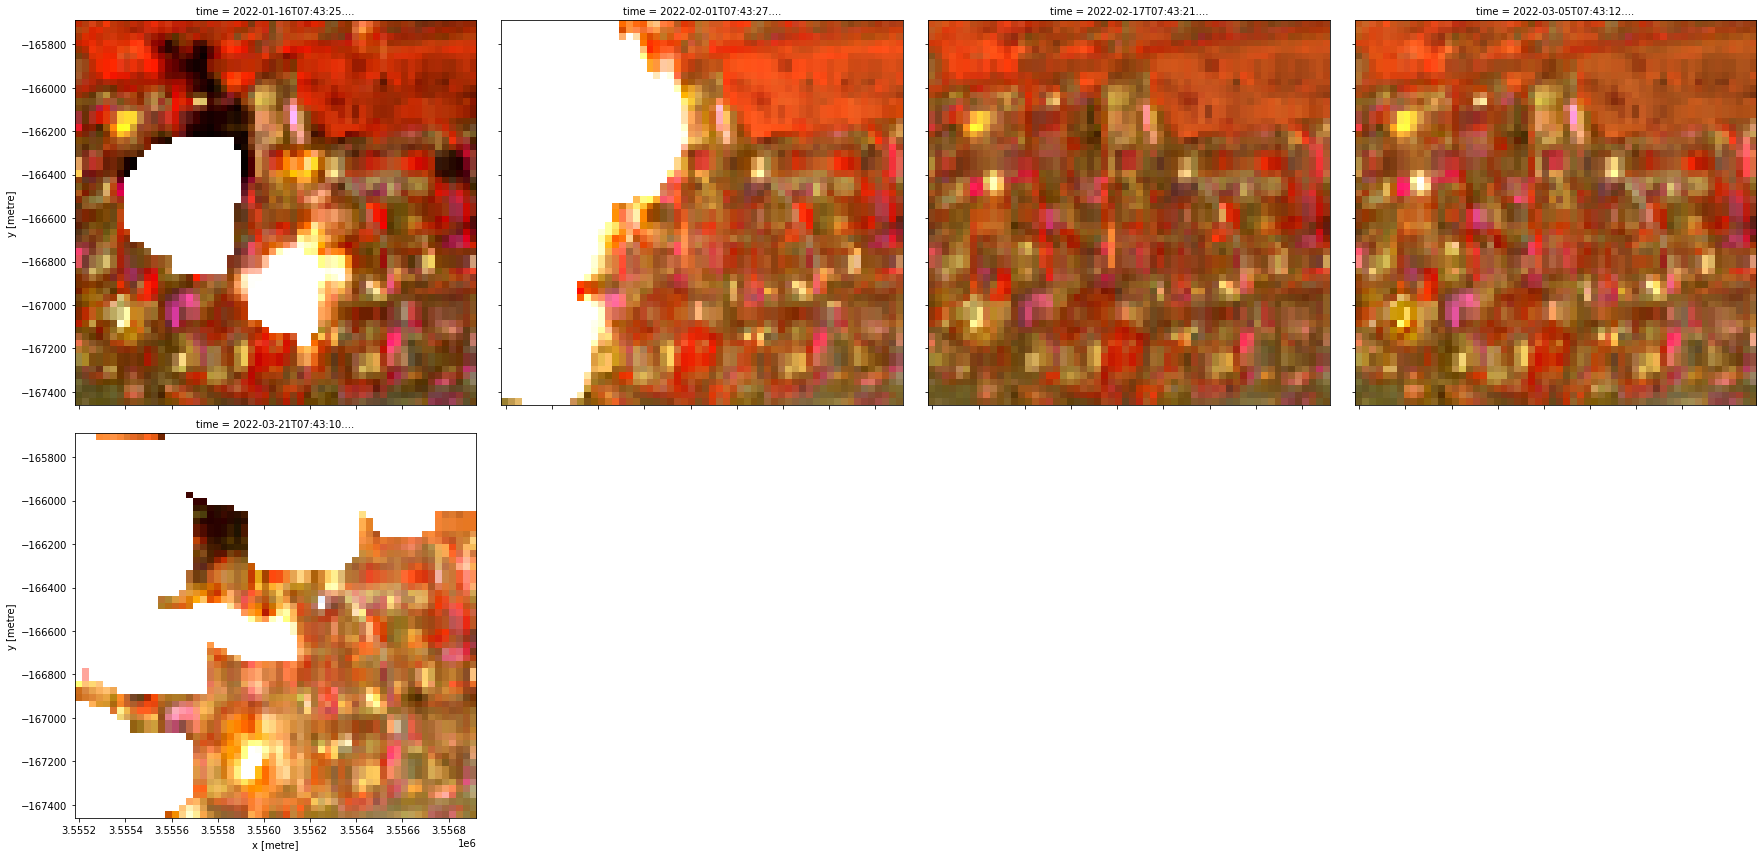

In [12]:
rgb(ds_ls9_sr,col='time',bands=['nir','red','blue'])

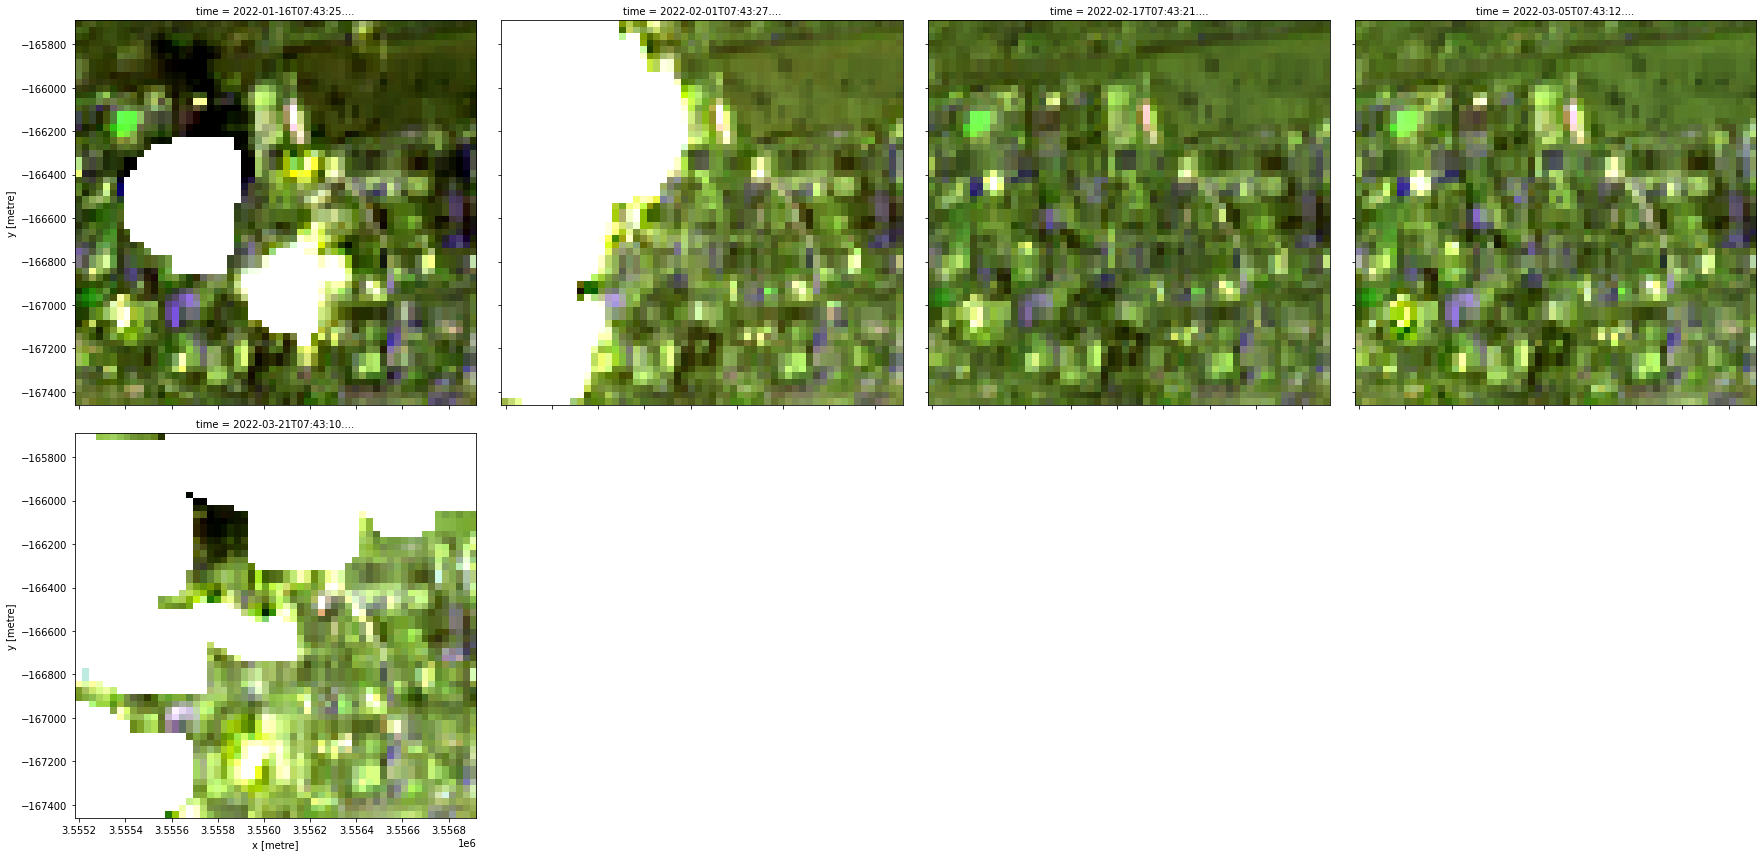

In [13]:
rgb(ds_ls9_sr,col='time',bands=['green','red','blue'])

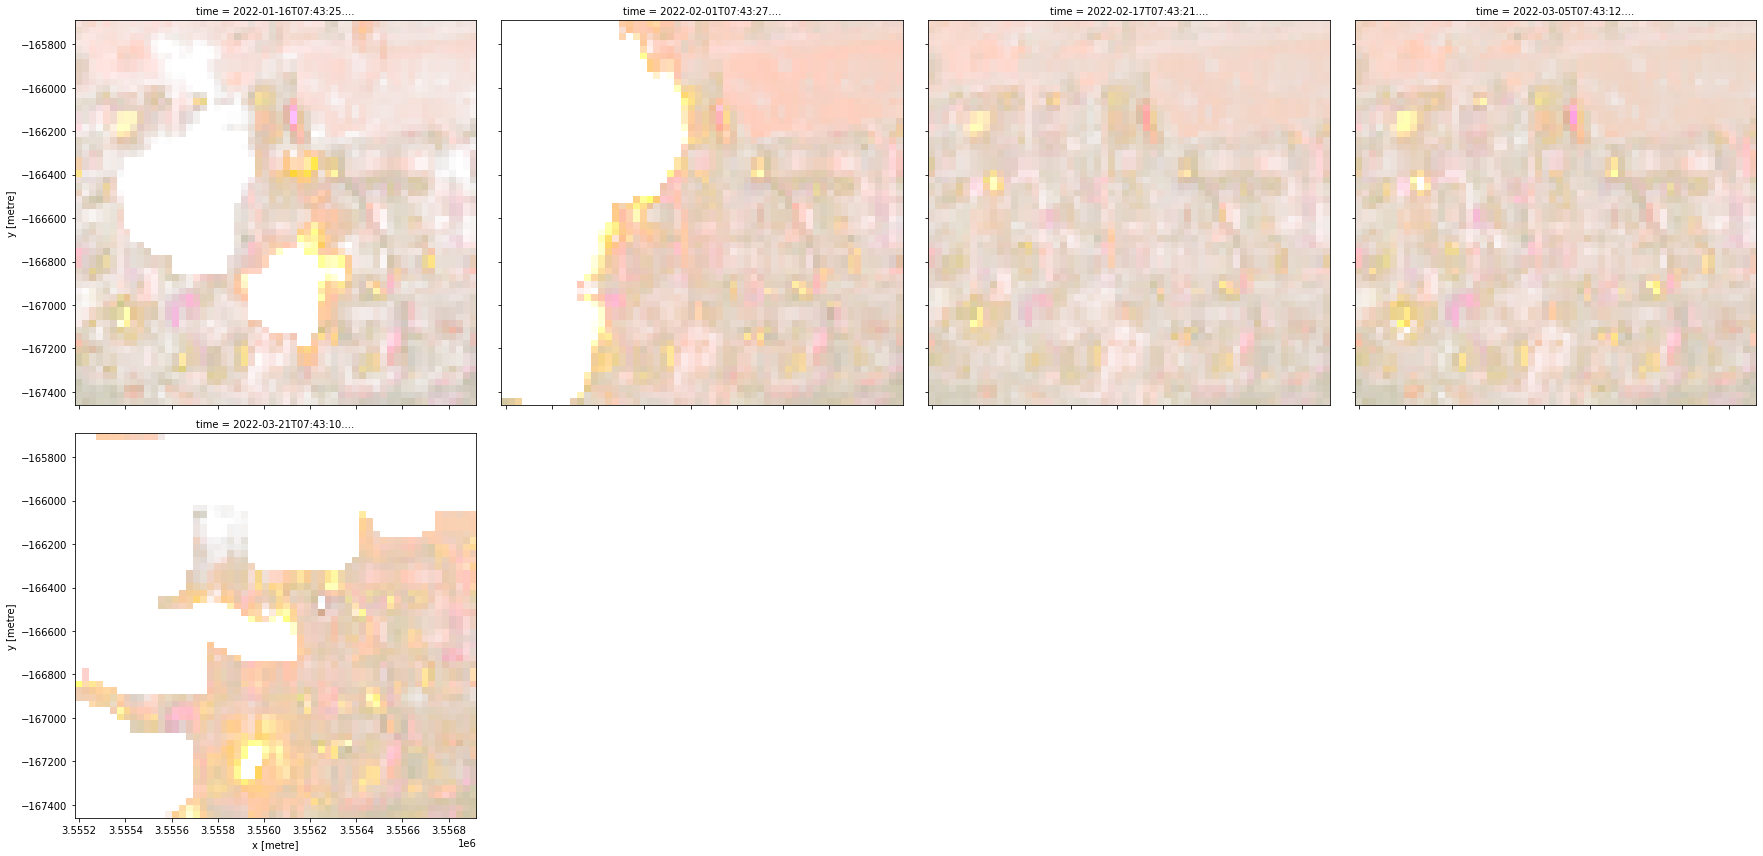

In [14]:
rgb(ds_ls9_sr,col='time',bands=['nir','red','blue','green'])

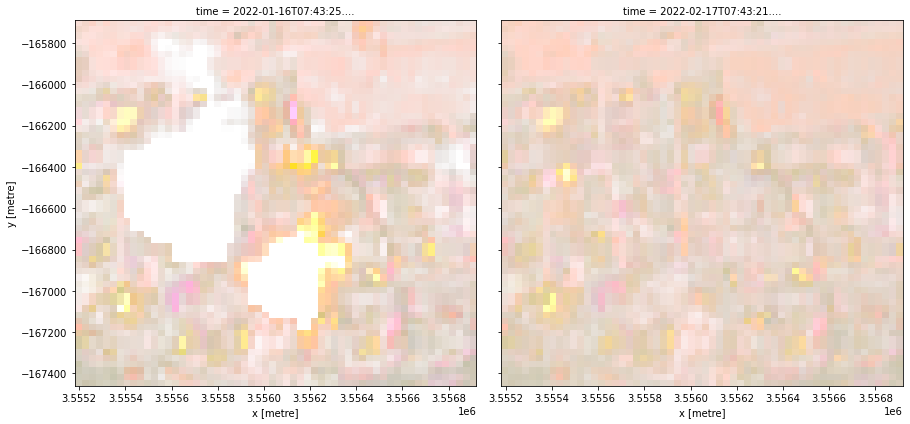

In [15]:
rgb(ds_ls9_sr,index=[0,2],bands=['nir','red','blue','green'])

this gives the first and third image

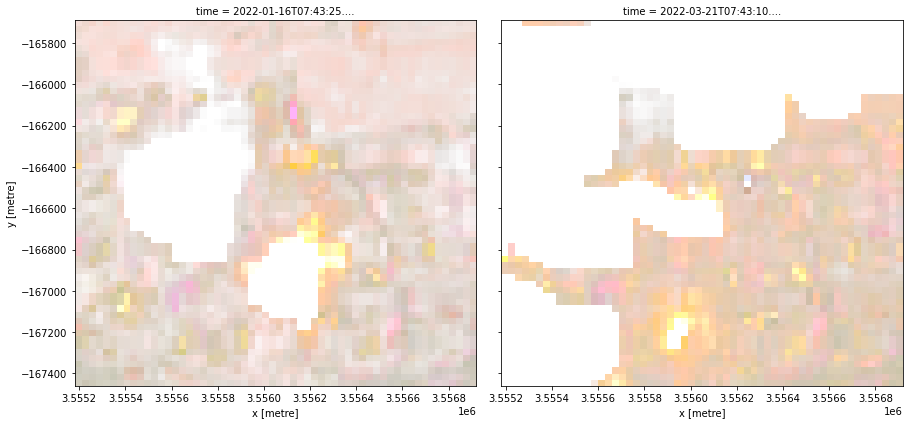

In [16]:
rgb(ds_ls9_sr,index=[0,4],bands=['nir','red','blue','green'])

NDVI formula =
-red+nir / red+nir

In [17]:
ndvi = (
    (ds_ls9_sr['nir'] - ds_ls9_sr['red'])
    /
    (ds_ls9_sr['nir'] + ds_ls9_sr['red'])
)

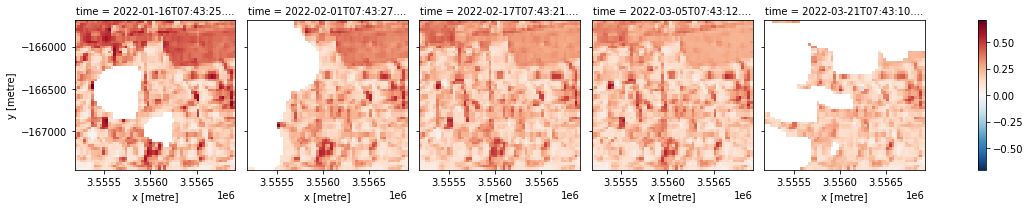

In [18]:
ndvi.plot(col='time')

ndwi formula  =  green-nir / green+nir

In [19]:
ndWi = (
    (ds_ls9_sr['green'] - ds_ls9_sr['nir'])
    /
    (ds_ls9_sr['green'] + ds_ls9_sr['nir'])
)

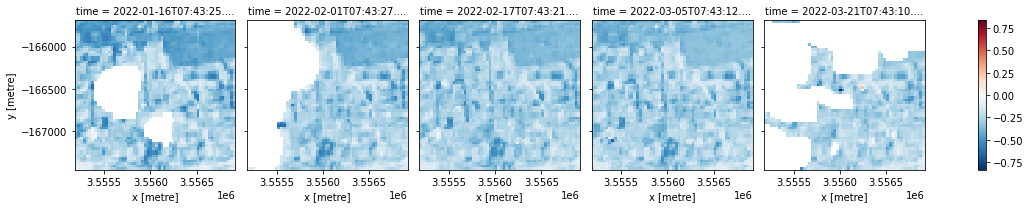

In [20]:
ndWi.plot(col='time')

mndwi formula = green-swir / green+swir

In [21]:
mndwi = (
    (ds_ls9_sr['green'] - ds_ls9_sr['swir_1'])
    /
    (ds_ls9_sr['green'] + ds_ls9_sr['swir_1'])
)

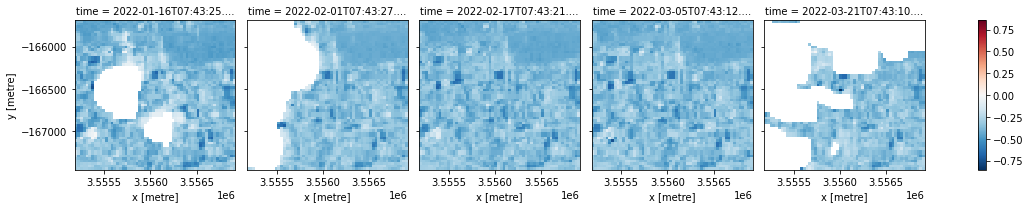

In [22]:
mndwi.plot(col='time')

EVI formula = (nir-red)/(nir+6*red-7.5*blue+1)

In [23]:
evi=2.5*((ds_ls9_sr['nir']-ds_ls9_sr['red'])
     /
     (ds_ls9_sr['nir']+6*ds_ls9_sr['red']-7.5*ds_ls9_sr['blue']+1)
    )

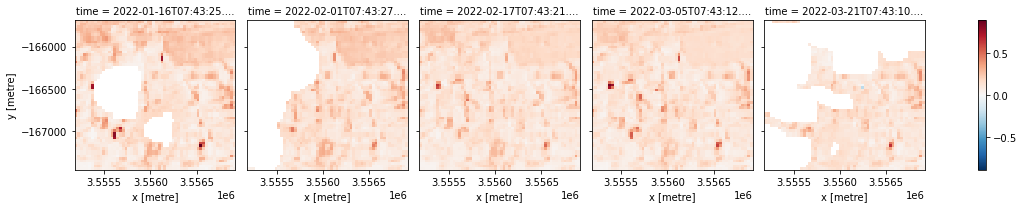

In [24]:
evi.plot(col='time')

In [25]:
from deafrica_tools.bandindices import calculate_indices 

In [26]:
ds_ls9_sr=calculate_indices(ds_ls9_sr,
                            index=['EVI','NDVI','NDWI'],
                            satellite_mission='ls'
                           )

In [27]:
ds_ls9_sr

<xarray.Dataset>
Dimensions:      (time: 5, y: 59, x: 58)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-16T07:43:25.746992 ... 2022-03...
  * y            (y) float64 -1.657e+05 -1.657e+05 ... -1.674e+05 -1.674e+05
  * x            (x) float64 3.555e+06 3.555e+06 ... 3.557e+06 3.557e+06
    spatial_ref  int32 6933
Data variables:
    green        (time, y, x) float32 0.07935 0.09177 0.09659 ... 0.1448 0.134
    red          (time, y, x) float32 0.08707 0.1021 0.1068 ... 0.1572 0.1471
    blue         (time, y, x) float32 0.05223 0.06155 0.06801 ... 0.1033 0.08311
    nir          (time, y, x) float32 0.2167 0.208 0.2374 ... 0.1757 0.1786
    swir_1       (time, y, x) float32 0.1993 0.208 0.2198 ... 0.2266 0.2429
    EVI          (time, y, x) float32 0.2405 0.195 0.2385 ... 0.03437 0.05465
    NDVI         (time, y, x) float32 0.4267 0.3418 0.3793 ... 0.05551 0.09651
    NDWI         (time, y, x) float32 -0.4639 -0.3878 ... -0.09654 -0.1427
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

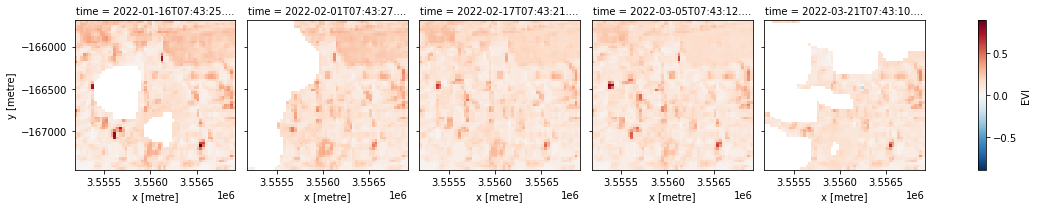

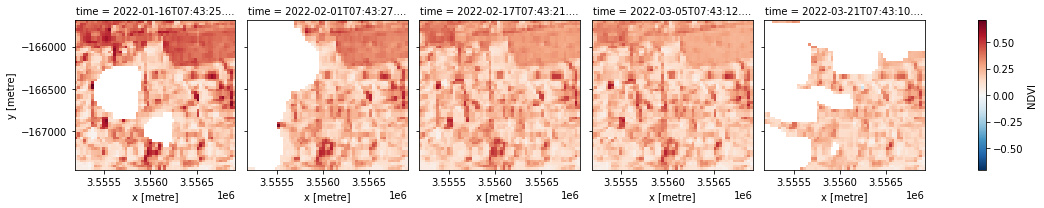

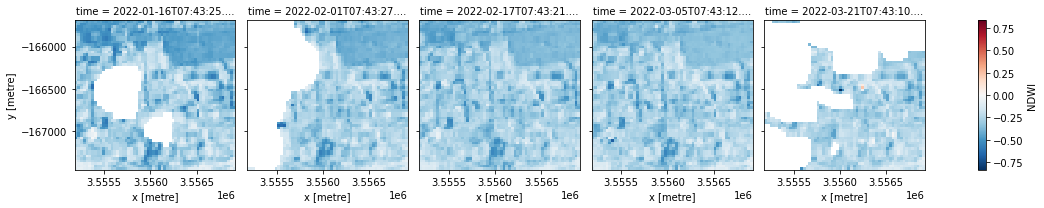

In [28]:
ds_ls9_sr['EVI'].plot(col='time')
ds_ls9_sr['NDVI'].plot(col='time')
ds_ls9_sr['NDWI'].plot(col='time')

TO CUSTOMIZE COLOR

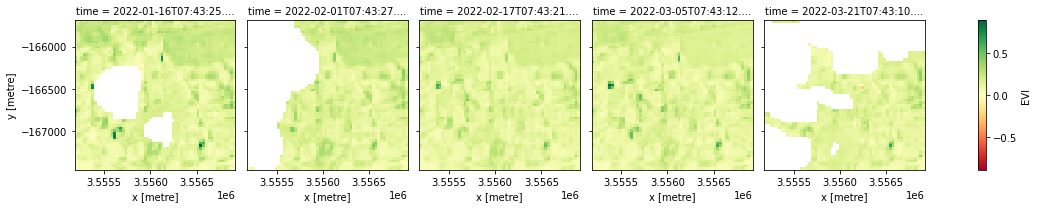

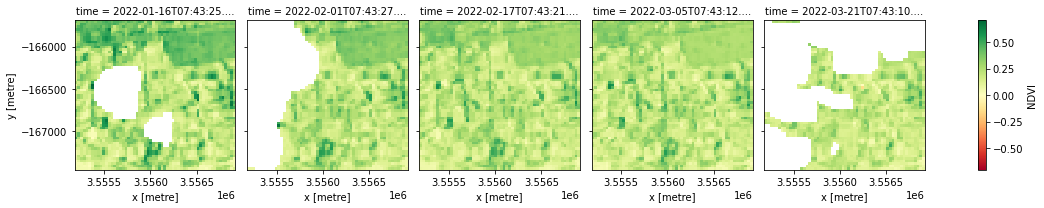

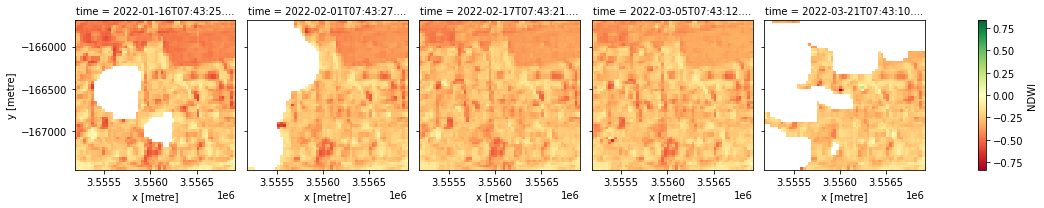

In [29]:
ds_ls9_sr['EVI'].plot(col='time',cmap='RdYlGn')
ds_ls9_sr['NDVI'].plot(col='time',cmap='RdYlGn')
ds_ls9_sr['NDWI'].plot(col='time',cmap='RdYlGn')

FUNCTION ; CONDITION TO IDENTIFY VEG

In [30]:
#ds_ls9_sr['NDVI'].where(ds_ls9_sr['NDVI']>0)

In [31]:
veg=ds_ls9_sr['NDVI'].where(ds_ls9_sr['NDVI']>0)

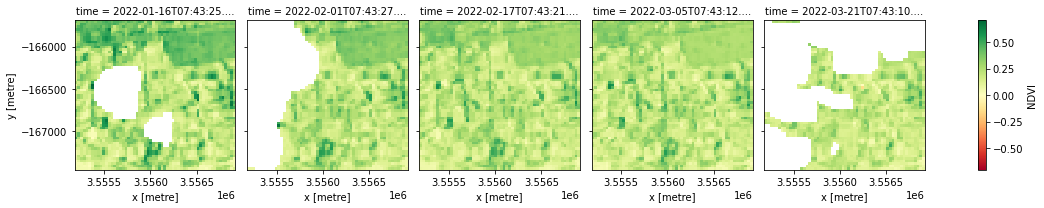

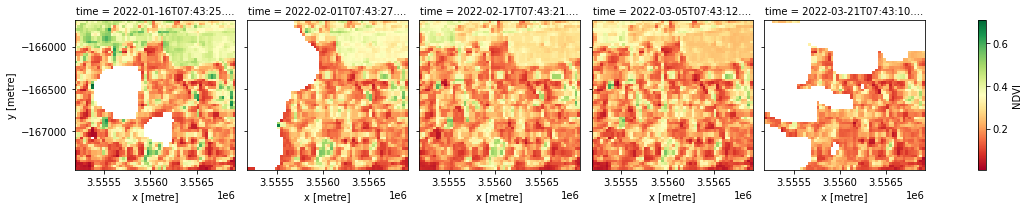

In [32]:
ds_ls9_sr['NDVI'].plot(col='time',cmap='RdYlGn')
veg.plot(col='time',cmap='RdYlGn')

In [33]:
#when looking for a range of values
veg=ds_ls9_sr['NDVI'].where((ds_ls9_sr['NDVI']>0)
                            &
                            (ds_ls9_sr['NDVI']<0.3)
                           )
                            

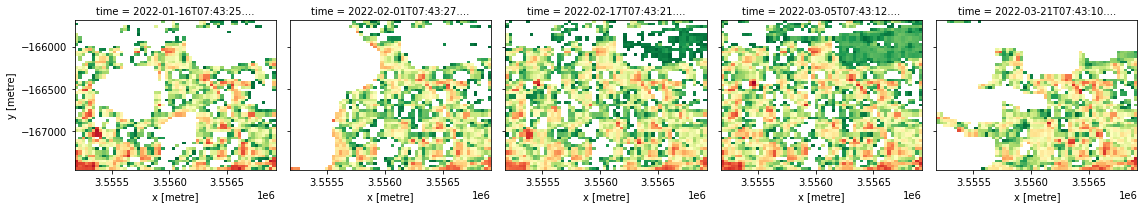

In [34]:
#differentiating add_colorbar statement
veg.plot(col='time',cmap='RdYlGn',add_colorbar=False)

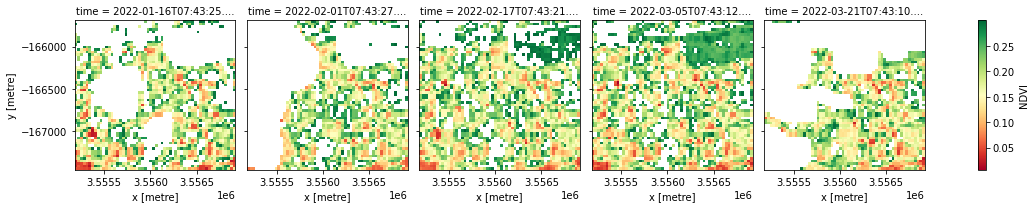

In [35]:
#differentiating add_colorbar statement
veg.plot(col='time',cmap='RdYlGn')

In [36]:
veg=ds_ls9_sr['EVI'].where((ds_ls9_sr['EVI']>0.1)
                           &
                           (ds_ls9_sr['EVI']<0.4)
                          )

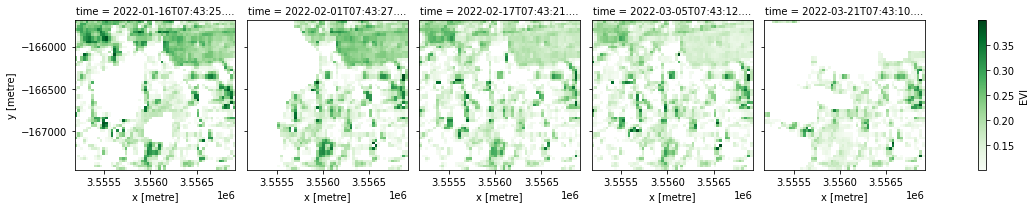

In [37]:
veg.plot(col='time',cmap='Greens')

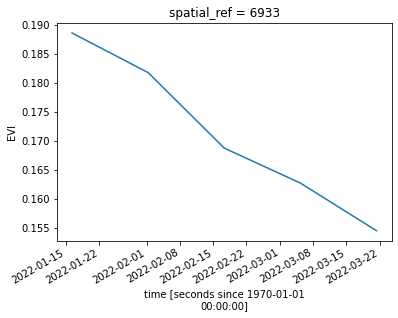

In [38]:
#doing a time series analysis
#we have started by collapsing all the pixels to one pixel
#veg.min(dim['x','y'])
#veg.max(dim['x','y'])
veg_mean=veg.mean(dim=['x','y'])
veg_mean.plot()


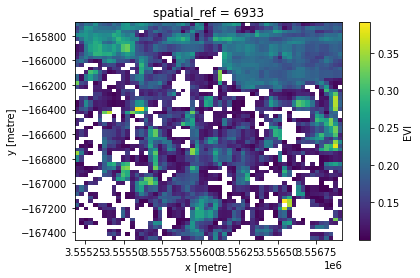

In [39]:
#when using x and y in dimension you get a graph but when you use time in dimension it gives a map
veg_mean=veg.mean(dim=['time'])
veg_mean.plot()

In [40]:
#ASSIGNMENT DAY2


In [41]:
import geopandas

In [42]:
Lake_Naivasha=geopandas.read_file('lake_naivasha.geojson')

In [43]:
Lake_Naivasha.explore()

In [44]:
extent=Lake_Naivasha.total_bounds
extent

array([36.24991751, -0.85771195, 36.46743076, -0.64826021])

In [45]:
x_range=(extent[0],extent[2])
y_range=(extent[1],extent[3])

In [46]:
ds_s2_l2a=load_ard(dc,
         products=['s2_l2a'],
         min_gooddata=0.6,
         output_crs='epsg:6933',
         resolution=(-20,20),
         y=(y_range),
         x=(x_range),
         time=('2020-01'),
         measurements=['green','red','blue','nir','swir_1']
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 7 out of 12 time steps with at least 60.0% good quality pixels
Applying pixel quality/cloud mask
Loading 7 time steps


In [47]:
from deafrica_tools.plotting import rgb

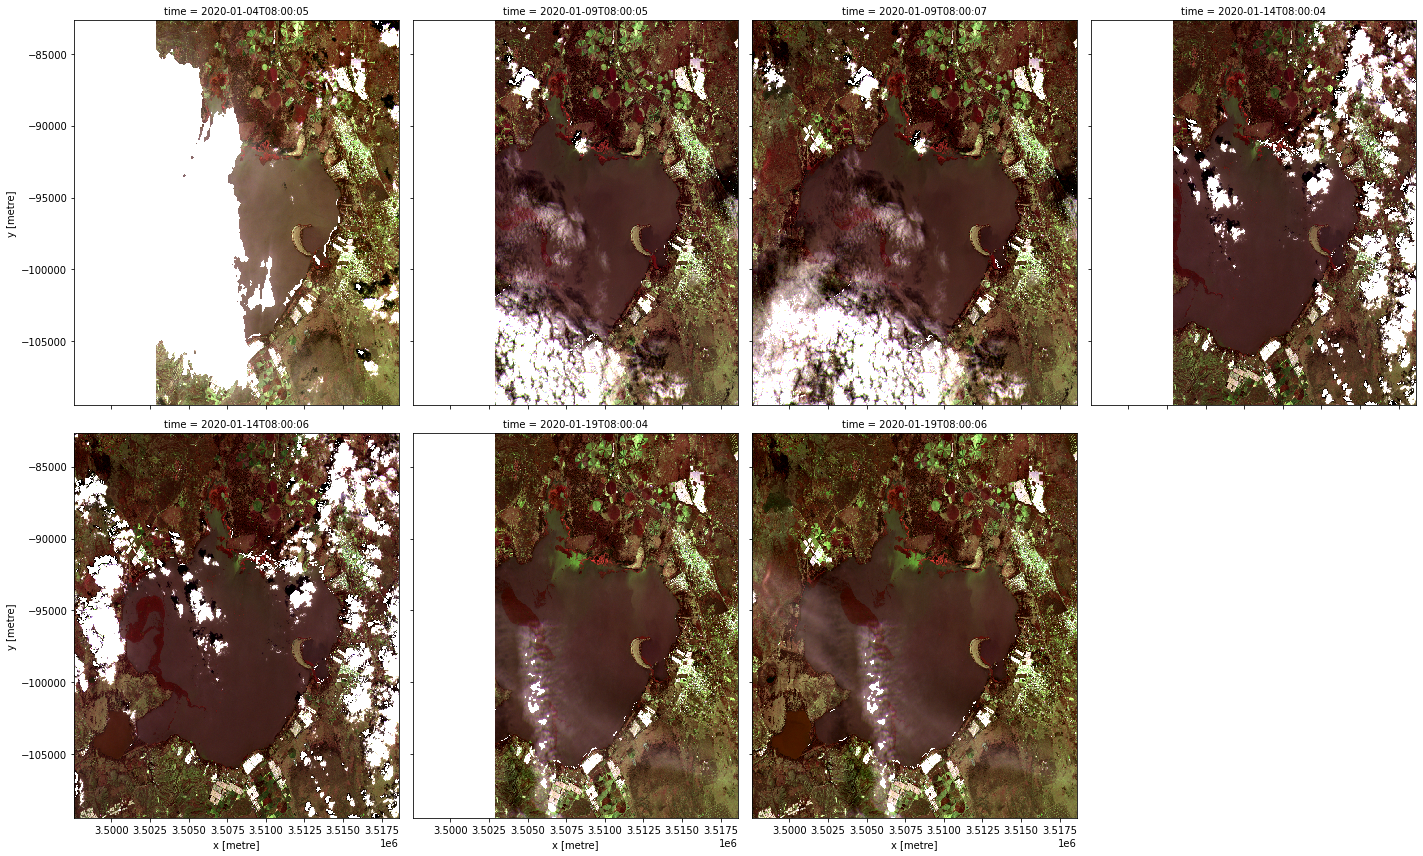

In [48]:
rgb(ds_s2_l2a,col='time',bands=['green','red','blue'])

In [49]:
from deafrica_tools.bandindices import calculate_indices 

In [50]:
ds_s2_l2a=calculate_indices(ds_s2_l2a,
                            index=['EVI','NDVI','MNDWI'],
                            satellite_mission='ls'
                           )

EVI=2.5*((ds_s2_l2a['nir']-ds_s2_l2a['red'])
     /
     (ds_s2_l2a['nir']+6*ds_s2_l2a['red']-7.5*ds_s2_l2a['blue']+1)
    )

MNDWI = (
    (ds_s2_l2a['green'] - ds_s2_l2a['swir_1'])
    /
    (ds_s2_l2a['green'] + ds_s2_l2a['swir_1'])
)

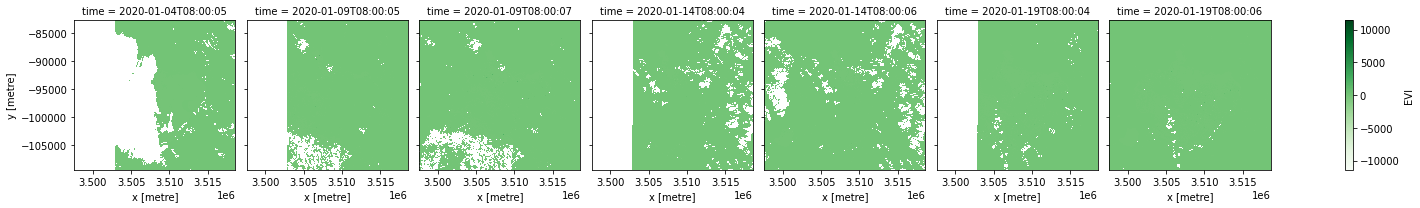

In [51]:
ds_s2_l2a['EVI'].plot(col='time',cmap='Greens')


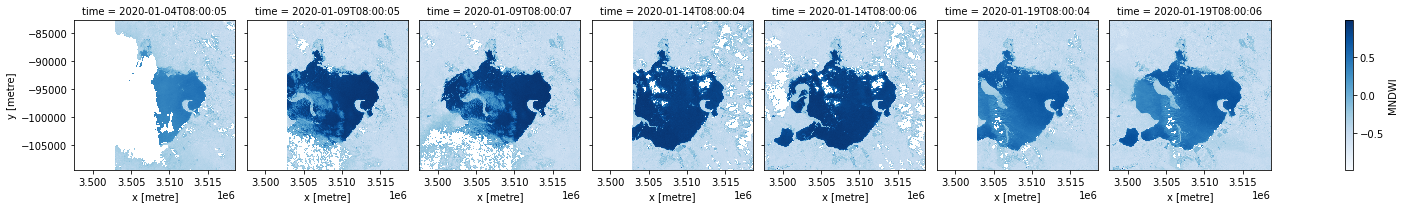

In [52]:
ds_s2_l2a['MNDWI'].plot(col='time',cmap='Blues')

In [53]:
veg=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

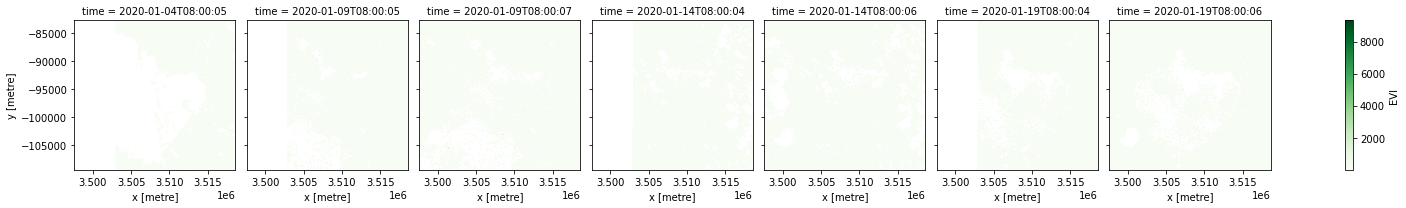

In [54]:
veg.plot(col='time',cmap='Greens')

In [55]:
wat=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

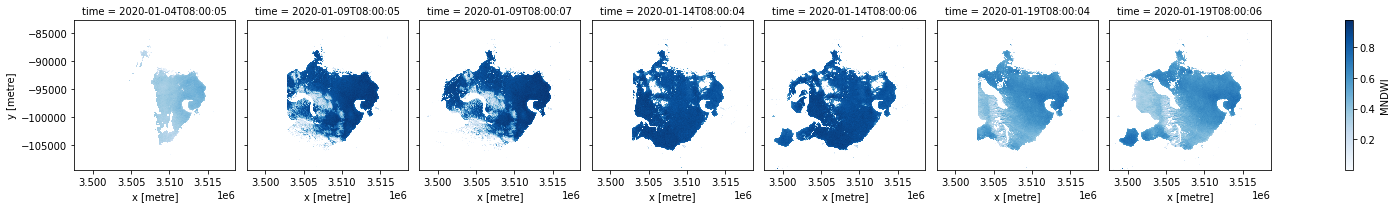

In [56]:
wat.plot(col='time',cmap='Blues')

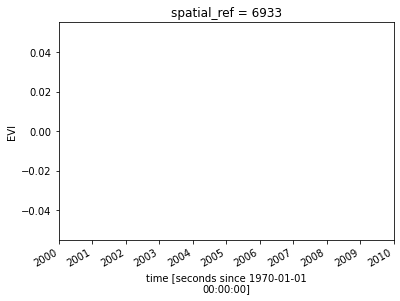

In [57]:
veg_mean=veg.mean(dim=['x','y'])
veg_mean.plot()

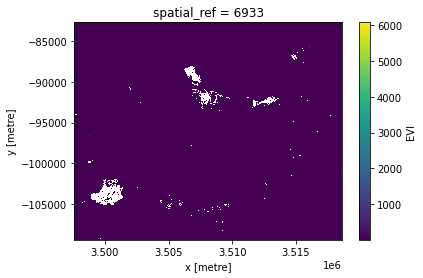

In [58]:
veg_mean=veg.mean(dim=['time'])
veg_mean.plot()

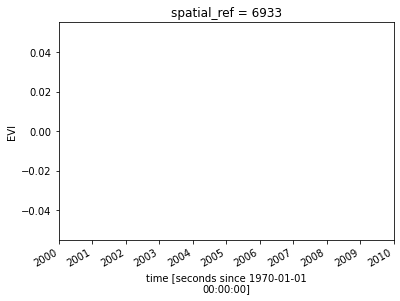

In [59]:
wat_mean=veg.mean(dim=['x','y'])
wat_mean.plot()

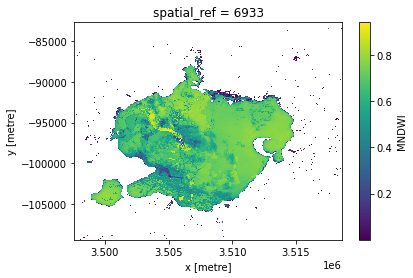

In [60]:
wat_mean=wat.mean(dim=['time'])
wat_mean.plot()

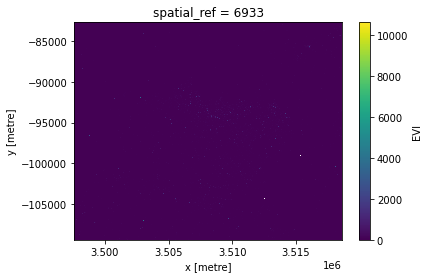

In [61]:
veg_sum=veg.sum(dim=['time'])
veg_sum.plot()

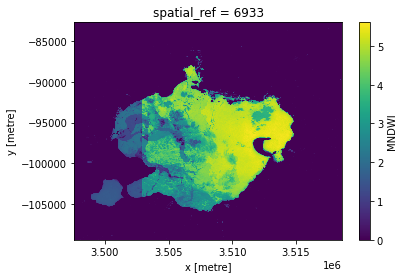

In [62]:
wat_sum=wat.sum(dim=['time'])
wat_sum.plot()

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


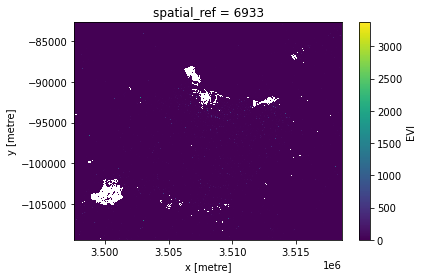

In [63]:
veg_std=veg.std(dim=['time'])
veg_std.plot()

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


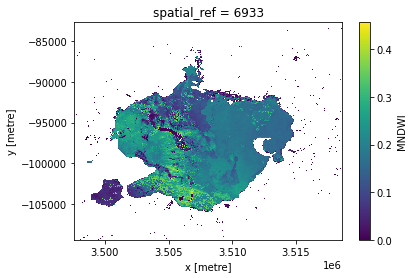

In [64]:
wat_std=wat.std(dim=['time'])
wat_std.plot()

In [65]:
ds_s2_12a['NDVI'].plot(col='time', cmap='RdYlGn')

NameError: name 'ds_s2_12a' is not defined

TRAINING DAY 3


In [73]:
ds_s2_l2a=load_ard(dc,
         products=['s2_l2a'],
         min_gooddata=0.6,
         output_crs='epsg:6933',
         resolution=(-20,20),
         y=(y_range),
         x=(x_range),
         time=('2020-01'),
         measurements=['green','red','blue','nir','swir_1']
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 7 out of 12 time steps with at least 60.0% good quality pixels
Applying pixel quality/cloud mask
Loading 7 time steps


In [74]:
from deafrica_tools.bandindices import calculate_indices 

In [75]:
ds_s2_l2a=calculate_indices(ds_s2_l2a,
                            index=['EVI','NDVI','MNDWI'],
                            satellite_mission='ls'
                           )

In [77]:
ds_s2_l2a['NDVI_filtered']= ds_s2_l2a['NDVI'].where (ds_s2_l2a['NDVI']>=0)


In [ ]:
ds_s2_12a['NDVI_filtered'].isel(time=1).plot(size=3)

In [ ]:
import xarray as xr
import numpy as np

In [ ]:
classes=[1,2,3,4]
class_label=["good","average","poor","non-vegetation"]

condition=[
    (ds_s2_12a['NDVI_filtered']>=0.5),
    (ds_s2_12a['NDVI_filtered']>=0.2)&(ds_s2_12a['NDVI_filtered']<0.5),
    (ds_s2_12a['NDVI_filtered']>=0)&(ds_s2_12a['NDVI_filtered']<0.2)
]

selection=np.select(conditions, classes)

ds_s2_12a['categorised_ndvi']=(xr.DataArray(selection,
                               coords={'time':ds_s2_12a.time,
                                       'y':ds_s2_12a.y,
                                       'x':ds_s2_12a.x},
                               dims=['time','y','x']))
                               